# Rental Listing Inquiries
Kaggle: https://www.kaggle.com/c/two-sigma-connect-rental-listing-inquiries

In [2]:
import pandas as pd
import numpy as np

train_data = pd.read_json('train.json')
test_data = pd.read_json('test.json')

In [3]:
# Load train and test data
initial_train_features = train_data.columns.values

print '--- Train data ---'
print 'Unique listings: ', train_data['listing_id'].count()
print 'Number of features: ', len(initial_train_features)
print 'List of features: ',
for i in range(len(initial_train_features)):
    if i == len(initial_train_features) - 1:
        print initial_train_features[i]
    else:
        print initial_train_features[i]+',',

train_data.head(20)

--- Train data ---
Unique listings:  49352
Number of features:  15
List of features:  bathrooms, bedrooms, building_id, created, description, display_address, features, interest_level, latitude, listing_id, longitude, manager_id, photos, price, street_address


,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street
100014,2.0,4,38a913e46c94a7f46ddf19b756a9640c,2016-04-19 04:24:47,,West 18th Street,[],medium,40.7429,6894514,-74.0028,b209e2c4384a64cc307c26759ee0c651,[https://photos.renthop.com/2/6894514_9abb8592...,7995,350 West 18th Street
100016,1.0,2,3ba49a93260ca5df92fde024cb4ca61f,2016-04-27 03:19:56,Stunning unit with a great location and lots o...,West 107th Street,"[prewar, elevator, Dogs Allowed, Cats Allowed,...",low,40.8012,6930771,-73.9660,01287194f20de51872e81f660def4784,[https://photos.renthop.com/2/6930771_7e3622b6...,3600,210 West 107th Street
100020,2.0,1,0372927bcb6a0949613ef5bf893bbac7,2016-04-13 06:01:42,"This huge sunny ,plenty of lights 1 bed/2 bath...",West 21st Street,"[Doorman, Elevator, Pre-War, Terrace, Laundry ...",low,40.7427,6867392,-73.9957,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/6867392_b18283f6...,5645,155 West 21st Street
100026,1.0,1,a7efbeb58190aa267b4a9121cd0c88c0,2016-04-20 02:36:35,<p><a website_redacted,Hamilton Terrace,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",medium,40.8234,6898799,-73.9457,c1a6598437b7db560cde66e5a297a53f,[https://photos.renthop.com/2/6898799_3759be4c...,1725,63 Hamilton Terrace
100027,2.0,4,0,2016-04-02 02:58:15,This is a spacious four bedroom with every bed...,522 E 11th,"[Dishwasher, Hardwood Floors]",low,40.7278,6814332,-73.9808,23a01ea7717b38875f5b070282d1b9d2,[https://photos.renthop.com/2/6814332_e19a8552...,5800,522 E 11th


In [4]:
initial_test_features = test_data.columns.values

print '--- Test data ---'
print 'Unique listings: ', test_data['listing_id'].count()
print 'Number of features: ', len(initial_test_features)
print 'List of features: ',
for i in range(len(initial_test_features)):
    if i == len(initial_test_features) - 1:
        print initial_test_features[i]
    else:
        print initial_test_features[i]+',',

#test_data.head()

--- Test data ---
Unique listings:  74659
Number of features:  14
List of features:  bathrooms, bedrooms, building_id, created, description, display_address, features, latitude, listing_id, longitude, manager_id, photos, price, street_address


In [5]:
# Ration of NaN values
ratio = {}
for i in initial_train_features:
    k = 0
    for j in train_data[i].values:
        if j == 'NaN' or j == [] or j == '0' or j == '':
            k += 1
    ratio[i] = round(k / float(train_data[i].count()), 10)  
ratio

{u'bathrooms': 0.0,
 u'bedrooms': 0.0,
 u'building_id': 0.1678959313,
 u'created': 0.0,
 u'description': 0.0292997244,
 u'display_address': 0.0027354515,
 u'features': 0.0652050575,
 u'interest_level': 0.0,
 u'latitude': 0.0,
 u'listing_id': 0.0,
 u'longitude': 0.0,
 u'manager_id': 0.0,
 u'photos': 0.0732493111,
 u'price': 0.0,
 u'street_address': 0.000202626}

In [6]:
# Cleaning and updating data
train_data['created'] = pd.to_datetime(train_data['created'])

In [7]:
# Creating new features
train_data['price_bd_ratio'] = np.where(train_data['bedrooms'] == 0, 
                                        train_data['price'], 
                                        train_data['price'] / train_data['bedrooms'])
train_data['created_year'] = train_data['created'].dt.year
train_data['created_month'] = train_data['created'].dt.month
train_data['created_day'] = train_data['created'].dt.day
train_data['is_description'] = np.where(train_data['description'].str.len() < 50, 0, 1)
train_data['features_count'] = train_data['features'].str.len()
train_data['photos_count'] = train_data['photos'].str.len()

In [8]:
# Updated building id
building_hash = {}
bd_id = 0
for item in train_data['building_id']:
    if item not in building_hash:
        building_hash[item] = bd_id
        bd_id += 1

building_id_list = []
for item in train_data['building_id']:
    building_id_list.append(building_hash[item])
train_data['building_id_updated'] = building_id_list

In [9]:
# Updated manager id
manager_hash = {}
mn_id = 0
for manager in train_data['manager_id']:
    if manager not in manager_hash:
        manager_hash[manager] = mn_id
        mn_id += 1

manager_id_list = []
for manager in train_data['manager_id']:
    manager_id_list.append(manager_hash[manager])
train_data['manager_id_updated'] = manager_id_list

In [10]:
# Creating feature format for data

def feature_format(df, features):
    cl = df.columns.values.tolist()
    cl.insert(0, cl.pop(cl.index('interest_level')))
    df = df.reindex(columns=cl)
    
    temp = pd.DataFrame(df[features[0]])
    for i in range(1, len(features)):
        temp[features[i]] = df[features[i]]
    return np.array(temp)

In [12]:
features_ = ['interest_level', 'bathrooms', 'bedrooms', 'building_id', 'created', 
             'description', 'display_address', 'features', 'latitude', 'listing_id', 
             'longitude', 'manager_id', 'photos', 'price', 'street_address', 
             'price_bd_ratio', 'created_year', 'created_month', 'created_day', 
             'is_description', 'features_count', 'photos_count','building_id_updated',
             'manager_id_updated']
excluded = ['building_id']
features_list = ['interest_level', 'bathrooms', 'bedrooms', 'latitude', 'longitude', 'price', 
            'price_bd_ratio', 'created_month', 'created_day', 'is_description', 'listing_id',
            'features_count', 'photos_count','building_id_updated', 'manager_id_updated']

data = feature_format(train_data, features_list)

In [13]:
def labels_features_split(data):
    labels = []
    features = []
    for i in data:
        labels.append(i[0])
        features.append(i[1:])
    return labels, features

labels, features = labels_features_split(data)
print features[0]

[1.5 3 40.7145 -73.9425 3000 1000.0 6 24 1 7211212 0 5 0 0]


In [14]:
from sklearn.feature_selection import SelectKBest, f_classif

In [15]:
selection = SelectKBest(f_classif, k=1)
selection.fit(features, labels)

SelectKBest(k=1, score_func=<function f_classif at 0x157afbed8>)

In [16]:
pvals = []
for i in range(0, len(selection.scores_)):
    pval = -np.log10(selection.pvalues_[i])
    pvals.append(pval)
    print features_list[i + 1], '-> score:', selection.scores_[i], ', pvalue:', pvals[i]

bathrooms -> score: 171.685997624 , pvalue: 74.3040750094
bedrooms -> score: 39.2590686846 , pvalue: 17.0364473223
latitude -> score: 0.594402084793 , pvalue: 0.258142436177
longitude -> score: 0.663269677168 , pvalue: 0.288050489313
price -> score: 14.4625599418 , pvalue: 6.27916993956
price_bd_ratio -> score: 22.2287163635 , pvalue: 9.64946301388
created_month -> score: 1.51036417316 , pvalue: 0.655922751255
created_day -> score: 33.752580786 , pvalue: 14.6485428984
is_description -> score: 397.759516759 , pvalue: 171.367202156
listing_id -> score: 19.0858927767 , pvalue: 8.28569380794
features_count -> score: 102.926046301 , pvalue: 44.6072422252
photos_count -> score: 29.4632520196 , pvalue: 12.7880943052
building_id_updated -> score: 826.516239634 , pvalue: inf
manager_id_updated -> score: 34.3500508351 , pvalue: 14.9076632525


In [17]:
from matplotlib import pyplot as plt

In [18]:
# Barchart function
%matplotlib inline 

def create_barchart(features_list, features_scores, desc, ylabel):
    features_scores = zip(features_list, features_scores)
    features_scores = sorted(features_scores, key=lambda x: x[1], reverse=True)

    features_sorted = [x[0] for x in features_scores]
    fl = np.array(features_sorted)
    sc = np.array([x[1] for x in features_scores])
    xs = np.arange(len(fl))

    plt.figure(figsize=(10, 8))
    plt.bar(xs, sc, alpha=0.5)
    plt.xticks(xs + 0.35, fl, rotation='vertical')
    plt.tight_layout()
    plt.ylabel(ylabel)
    plt.title('Feature Scores')
    plt.savefig(desc, bbox_inches='tight')
    plt.show()
    return features_sorted

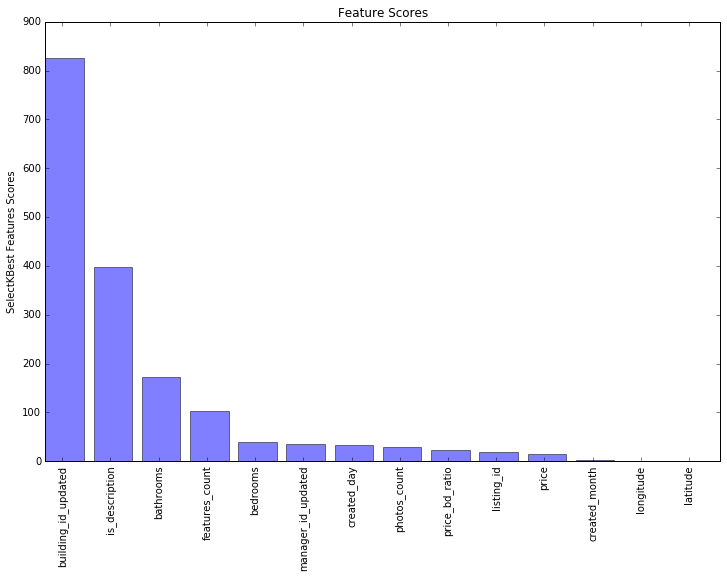

In [19]:
# Scores for features by SelectKBest

sorted_feature_list = create_barchart(features_list[1:], selection.scores_,
                                      'selectkbest_barchart.png', 'SelectKBest Features Scores')

In [116]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

def calc_recall_pres(feature_list, dataset, desc):
    current_feature_list = ['interest_level']
    precisions = []
    recalls = []

    features_num = []
    print 'Processing...'

    for i in range(0, len(feature_list)):
        current_feature_list.append(feature_list[i])
        data = feature_format(dataset, current_feature_list)

        labels, features = labels_features_split(data)
        features_train, features_test, labels_train, labels_test = \
                train_test_split(features, labels, test_size=0.33, random_state=42)

        clf = KNeighborsClassifier()
        clf.fit(features_train, labels_train)

        pred = clf.predict(features_test)
        
        #print current_feature_list
        #print clf.score(features_test, labels_test)
        precisions.append(metrics.precision_score(labels_test, pred, average='macro'))
        recalls.append(metrics.recall_score(labels_test, pred, average='macro'))
        features_num.append(len(current_feature_list))
        
    plt.figure()
    plt.scatter(np.array(features_num), np.array(precisions))
    plt.plot(np.array(features_num), np.array(precisions), label='Precision')
    plt.scatter(features_num, recalls, color='green')
    plt.plot(features_num, recalls, label='Recall')
    plt.legend(loc='upper right', shadow=True)
    plt.xlabel('Number of Features')
    plt.ylabel('Value')
    plt.title('Precision and Recall vs. Number of Features')
    plt.show()
    plt.savefig(desc)

Processing...


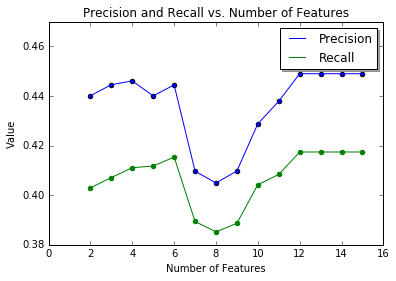

In [117]:
# Precision and recall scores for selected number of features
calc_recall_pres(sorted_feature_list, train_data, 'selectkbest_prec_recall.png')